In [1]:
import pandas as pd
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.datasets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping


In [2]:
df=pd.read_csv("Resources/Data/movies.csv")
df["like_count%"]=df["like_count"]/df["view_count"]
df["comment_count%"]=df["comment_count"]/df["view_count"]
df=df.replace([np.inf, -np.inf], np.nan)
df=df[df["gross"]!=0]
df.isnull().sum(axis = 0)
df.tail()

,movie,budge,gross,comment_count,view_count,like_count,year,like_count%,comment_count%
547,The Lady in the Van,6000000.0,10021175.0,448,1719140,6604,2016,0.003841,0.000261
548,Ride Along 2,40000000.0,90862685.0,2579,14863533,48871,2016,0.003288,0.000174
549,Norm of the North,18000000.0,17062499.0,0,2382637,0,2016,0.000000,0.000000
550,The Masked Saint,3500000.0,182695.0,8,49350,139,2016,0.002817,0.000162
551,The Forest,10000000.0,26594261.0,2644,6716059,20913,2016,0.003114,0.000394


In [3]:
dataset=df.copy()
dataset.head()
dataset.head()
dataset["profit"]=dataset["gross"]-dataset["budge"]
df.head()
# X=dataset.iloc[:,[1,3,4,5]]
def posneg(x):
    if x>=0:
        return 1
    else:
        return 0
# y=dataset.iloc[:,[2]]
dataset["profit"]=dataset["profit"].apply(posneg)  


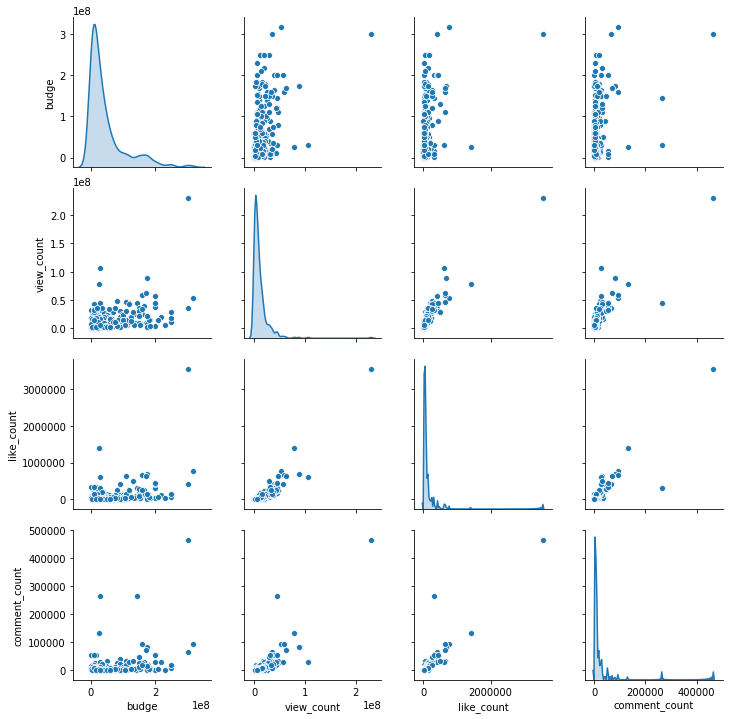

In [4]:
X=dataset.iloc[:,[1,3,4,5,7,8]]
# X=dataset.iloc[:,[1,3,4,5]]

y=dataset.iloc[:,[9]]
# y=dataset.iloc[:,[7]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
sns.pairplot(X_train[["budge", "view_count", "like_count","comment_count"]], diag_kind="kde")
plt.show()

#check distribution of this dataset

In [5]:
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

#check nan values

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)


1.0

In [7]:
rf.score(X_test, y_test)


0.5793650793650794

In [8]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)


In [9]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=6))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))

model2=Sequential()
model2.add(Dense(units=6, activation='relu', input_dim=6))
model2.add(Dropout(0.2))
model2.add(Dense(units=6, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=6, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=2, activation='softmax'))

model3=Sequential()
model3.add(Dense(units=6, activation='selu', input_dim=6))
model3.add(Dropout(0.2))
model3.add(Dense(units=6, activation='selu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=6, activation='selu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=2, activation='softmax'))

model4=Sequential()
model4.add(Dense(units=6, activation='selu', input_dim=6))
model4.add(Dropout(0.2))
model4.add(Dense(units=6, activation='selu'))
model4.add(Dropout(0.2))
model4.add(Dense(units=6, activation='selu'))
model4.add(Dropout(0.2))
model4.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Fit the model to the training data
k=model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)


Instructions for updating:
Use tf.cast instead.
Epoch 1/500
 - 1s - loss: 0.7073 - acc: 0.4734
Epoch 2/500
 - 0s - loss: 0.7043 - acc: 0.5160
Epoch 3/500
 - 0s - loss: 0.7034 - acc: 0.4202
Epoch 4/500
 - 0s - loss: 0.7010 - acc: 0.4468
Epoch 5/500
 - 0s - loss: 0.6963 - acc: 0.4867
Epoch 6/500
 - 0s - loss: 0.6969 - acc: 0.4947
Epoch 7/500
 - 0s - loss: 0.6941 - acc: 0.5027
Epoch 8/500
 - 0s - loss: 0.6955 - acc: 0.5213
Epoch 9/500
 - 0s - loss: 0.6921 - acc: 0.4947
Epoch 10/500
 - 0s - loss: 0.6953 - acc: 0.4867
Epoch 11/500
 - 0s - loss: 0.6910 - acc: 0.5080
Epoch 12/500
 - 0s - loss: 0.6924 - acc: 0.5053
Epoch 13/500
 - 0s - loss: 0.6936 - acc: 0.5133
Epoch 14/500
 - 0s - loss: 0.6916 - acc: 0.5080
Epoch 15/500
 - 0s - loss: 0.6904 - acc: 0.5160
Epoch 16/500
 - 0s - loss: 0.6880 - acc: 0.5106
Epoch 17/500
 - 0s - loss: 0.6926 - acc: 0.4867
Epoch 18/500
 - 0s - loss: 0.6922 - acc: 0.5266
Epoch 19/500
 - 0s - loss: 0.6873 - acc: 0.5426
Epoch 20/500
 - 0s - loss: 0.6884 - acc: 0.5266
E

Epoch 165/500
 - 0s - loss: 0.6528 - acc: 0.6011
Epoch 166/500
 - 0s - loss: 0.6398 - acc: 0.6330
Epoch 167/500
 - 0s - loss: 0.6531 - acc: 0.6144
Epoch 168/500
 - 0s - loss: 0.6385 - acc: 0.6223
Epoch 169/500
 - 0s - loss: 0.6492 - acc: 0.6277
Epoch 170/500
 - 0s - loss: 0.6423 - acc: 0.6090
Epoch 171/500
 - 0s - loss: 0.6304 - acc: 0.6622
Epoch 172/500
 - 0s - loss: 0.6469 - acc: 0.6144
Epoch 173/500
 - 0s - loss: 0.6381 - acc: 0.6489
Epoch 174/500
 - 0s - loss: 0.6344 - acc: 0.6356
Epoch 175/500
 - 0s - loss: 0.6281 - acc: 0.6569
Epoch 176/500
 - 0s - loss: 0.6242 - acc: 0.6516
Epoch 177/500
 - 0s - loss: 0.6394 - acc: 0.6410
Epoch 178/500
 - 0s - loss: 0.6563 - acc: 0.6037
Epoch 179/500
 - 0s - loss: 0.6565 - acc: 0.5931
Epoch 180/500
 - 0s - loss: 0.6532 - acc: 0.6702
Epoch 181/500
 - 0s - loss: 0.6255 - acc: 0.6543
Epoch 182/500
 - 0s - loss: 0.6417 - acc: 0.6037
Epoch 183/500
 - 0s - loss: 0.6281 - acc: 0.6516
Epoch 184/500
 - 0s - loss: 0.6588 - acc: 0.6303
Epoch 185/500
 - 0s 

 - 0s - loss: 0.6378 - acc: 0.6383
Epoch 333/500
 - 0s - loss: 0.6291 - acc: 0.6303
Epoch 334/500
 - 0s - loss: 0.6361 - acc: 0.6516
Epoch 335/500
 - 0s - loss: 0.6395 - acc: 0.6037
Epoch 336/500
 - 0s - loss: 0.6157 - acc: 0.6702
Epoch 337/500
 - 0s - loss: 0.6440 - acc: 0.6303
Epoch 338/500
 - 0s - loss: 0.6349 - acc: 0.6277
Epoch 339/500
 - 0s - loss: 0.6256 - acc: 0.6436
Epoch 340/500
 - 0s - loss: 0.6352 - acc: 0.6223
Epoch 341/500
 - 0s - loss: 0.6253 - acc: 0.6277
Epoch 342/500
 - 0s - loss: 0.6215 - acc: 0.6436
Epoch 343/500
 - 0s - loss: 0.6304 - acc: 0.6436
Epoch 344/500
 - 0s - loss: 0.6161 - acc: 0.6410
Epoch 345/500
 - 0s - loss: 0.6365 - acc: 0.6330
Epoch 346/500
 - 0s - loss: 0.6241 - acc: 0.6489
Epoch 347/500
 - 0s - loss: 0.6331 - acc: 0.6303
Epoch 348/500
 - 0s - loss: 0.6123 - acc: 0.6463
Epoch 349/500
 - 0s - loss: 0.6359 - acc: 0.6223
Epoch 350/500
 - 0s - loss: 0.6361 - acc: 0.6330
Epoch 351/500
 - 0s - loss: 0.6394 - acc: 0.6223
Epoch 352/500
 - 0s - loss: 0.6224

Epoch 500/500
 - 0s - loss: 0.6226 - acc: 0.6489


In [13]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.5889 - acc: 0.7302
Deep Neural Network - Loss: 0.5889309985297067, Accuracy: 0.7301587462425232


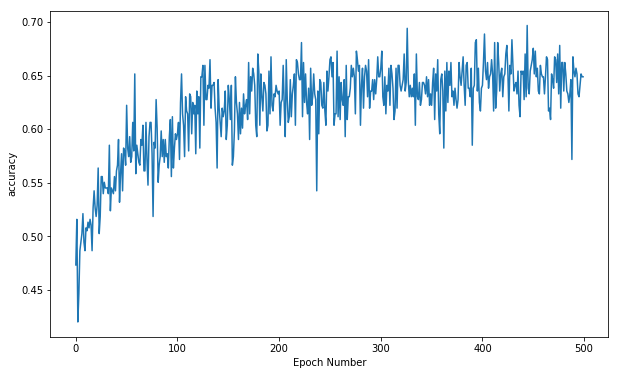

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('Epoch Number')
plt.ylabel("accuracy")
plt.plot(k.history['acc'])


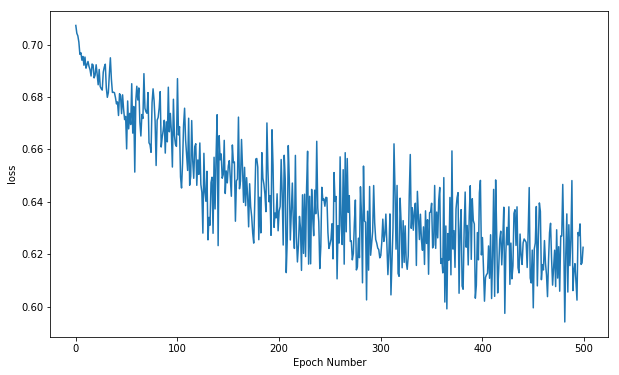

In [15]:
plt.figure(figsize=(10,6))

plt.xlabel('Epoch Number')
plt.ylabel("loss")

plt.plot(k.history['loss'])


In [18]:
deepkk=model.predict_classes(X_test_scaled)
y_comp=y_test.copy()
y_comp["profit_predict"]=deepkk
y_comp.head()

,profit,profit_predict
12,0,0
10,1,1
345,1,1
482,1,0
395,0,0


In [19]:
zz=(y_comp["profit"]==y_comp["profit_predict"]).sum()/len(deepkk)

In [20]:
print(f"accuracy on test dataset is {round(zz*100,2)}%")

accuracy on test dataset is 73.02%


In [21]:
model.predict_classes(X_test_scaled[0].reshape(-1,1).T)

array([0], dtype=int64)

In [25]:
#userinput

data = []
print(X.iloc[:,[0,1,2,3]].columns)
n = 4
for i in range(0, n):
    x = int(input('Enter the value in order: '))
    data.append(x)
data.append(data[3]/data[2])
data.append(data[1]/data[2])

Index(['budge', 'comment_count', 'view_count', 'like_count'], dtype='object')
Enter the value in order: 150000
Enter the value in order: 1500
Enter the value in order: 1511
Enter the value in order: 11111


In [26]:
preview=pd.DataFrame(data).T
preview.columns=X.columns
preview

,budge,comment_count,view_count,like_count,like_count%,comment_count%
0,150000.0,1500.0,1511.0,11111.0,7.353408,0.99272


In [27]:
#userinput
zzz=model.predict_classes(X_scaler.transform(np.array(data).reshape(-1,1).T))
zzz

array([1], dtype=int64)

In [28]:
if zzz==1:
    print("user input prediction is profitable")
else:
    print("user input prediction is not profitable")

user input prediction is profitable


In [29]:
model.save("movie_model_trained.h5")

In [30]:
from sklearn.externals.joblib import dump, load
dump(X_scaler, 'std_scaler.bin', compress=True)


['std_scaler.bin']

In [31]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
sc=load('std_scaler.bin')


In [33]:
rf.feature_importances_

array([0.17698403, 0.154834  , 0.15736601, 0.19680412, 0.16590307,
       0.14810877])

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.train.get_or_create_global_step()

In [35]:
model.predict_classes(X_test_scaled[3].reshape(-1,1).T)

array([0], dtype=int64)

In [36]:
model.predict(X_test_scaled[3].reshape(-1,1).T)[0][0]

0.51555485

In [37]:
sas=model.predict_classes(X_test_scaled[3].reshape(-1,1).T)

In [38]:
sasa=model.predict(X_test_scaled[3].reshape(-1,1).T)

In [39]:
sasa[0]

array([0.51555485, 0.48444518], dtype=float32)